In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
os.chdir('../dependencies')
from linear_regression import linear_regression 

In [2]:
os.chdir('../data/')

# UCI Repository : Computer Hardware Data

## Manual Preprocessing

In [3]:
filename = 'machine.data'

In [4]:
df_raw = analytics.read_csv(filename,header = None)
df_raw

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [5]:
names = ["vendor_name", "model_name", "myct", "mmin", "mmax", "cach" , "chmin", "chmax", "prp", "erp"]
df_raw.columns = names
df_raw

,vendor_name,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [6]:
df_raw = df_raw.drop(['erp','model_name','vendor_name'],axis = 1)
df_raw

,myct,mmin,mmax,cach,chmin,chmax,prp
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [7]:
df_raw.to_csv('preprocessed_data.csv',header=None,index=False)
names = list(df_raw.columns[:-1])

It is an assumption that all the attributes present in df_raw except prp adds up in some percentage to be the prp

## Prediction using Linear Regression

In [8]:
lin_reg = linear_regression(names)

### Defining Monte Carlo Parameters

In [9]:
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

### Linear Regression 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:48<00:00, 10.88s/it]
Best Alpha is  0.1
Weights for the attributes are : 
  Attributes  Weights
0       bias  -43.611
1       myct   61.572
2       mmin  539.354
3       mmax  271.189
4       cach   99.771
5      chmin   61.067
6      chmax  330.706
Average training RSME for alpha =  0.1  :  52.064
Average testing RMSE for alpha =  0.1  :  84.809


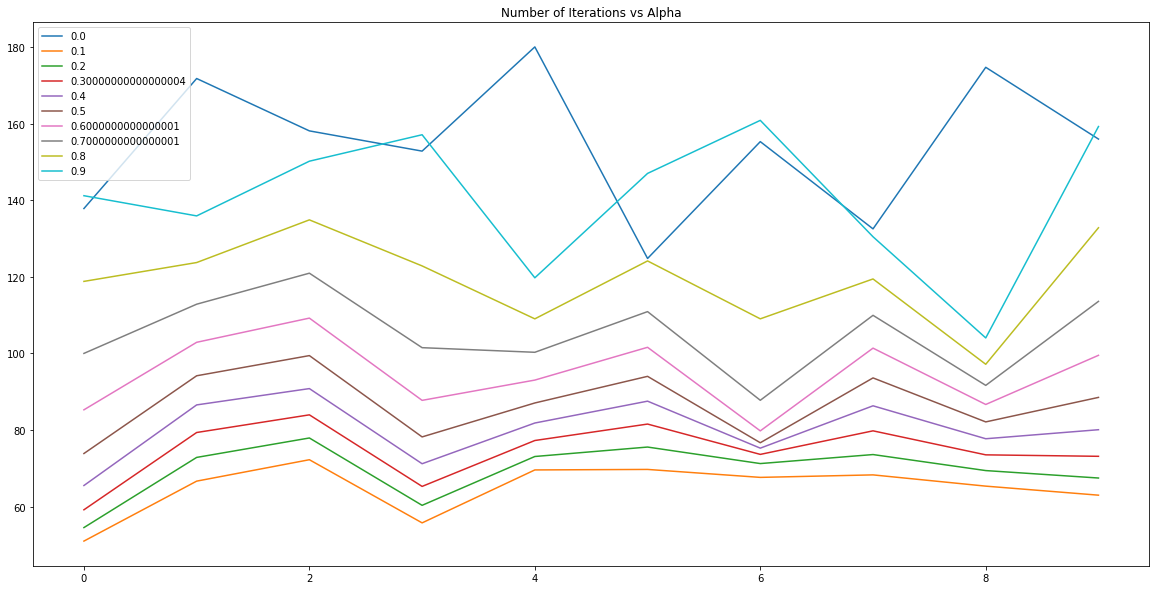

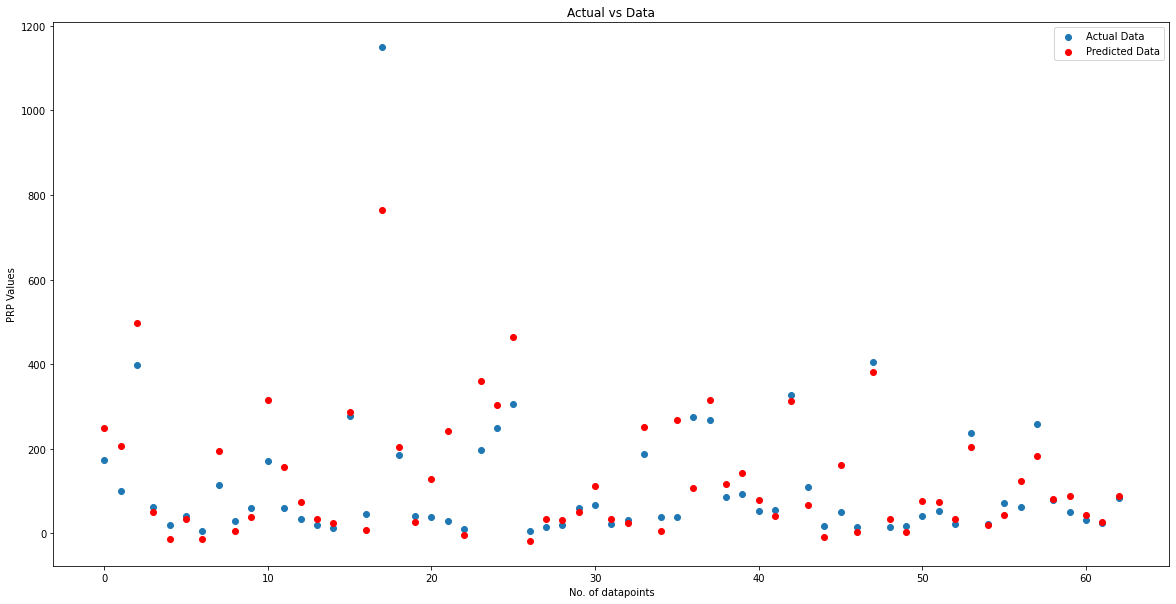

In [10]:
lin_reg.load_data('preprocessed_data.csv')
lin_reg.monte_carlo(alphas = alphas , k = number_of_iterations , training_perc = training_perc)
df_train , df_test = lin_reg.split_data()
lin_reg.train(df_train)
df_test = lin_reg.test(df_test)